### 5-3．深層学習のためのデータ準備
#### データセットの作成

In [1]:
# OpenCVのインストール
# !pip install opencv-python

In [2]:
import os
import cv2
import numpy as np

# 画像フォルダの指定
dirs = ['ants', 'bees']

# 画像のピクセル値とラベルを格納するリストを生成
pixels = [] # 説明変数
labels = [] # 目的変数

# 各フォルダのファイルを1つずつ読み込み、処理してリストへ格納
for i, d in enumerate(dirs):
    # ファイルの取得
    files = os.listdir('./data/' + d)
    
    for f in files:
        # 画像をグレースケールで読み込み
        img = cv2.imread('./data/' + d + '/' + f, 0)
        # 画像をリサイズ
        img = cv2.resize(img, (128, 128))
        # ピクセル値の格納
        img = np.array(img).flatten().tolist()
        pixels.append(img)
        
        # 画像のラベルをリストへ格納 
        labels.append(i)

In [3]:
# Numpy配列へ変換して2次元配列へリサイズ
pixels = np.array(pixels)/255
# print(pixels)
pixels = pixels.reshape([-1, 128, 128, 1])
# print(pixels)

labels = np.array(labels)

# 画像1枚目のデータサイズを確認
print(pixels.shape)
print(pixels[0].shape)
# 画像1枚目のラベルを確認
print(labels[0])

(397, 128, 128, 1)
(128, 128, 1)
0


In [4]:
from sklearn import model_selection

# データセットを訓練データとテストデータに分割
trainX, testX, trainY, testY = model_selection.train_test_split(pixels, labels, test_size=0.2)

# 訓練データとテストデータのサイズ確認
print(len(trainY))
print(len(testY))

317
80


##### === モデル作成はここから ======================

In [5]:
# !pip install keras

In [6]:
# kerasの読み込み
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
# 1つ目の畳み込み層とプーリング層
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
# 2つ目の畳み込み層とプーリング層
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
# 全結合層
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# 出力層
model.add(Dense(1, activation='sigmoid'))

# 作成したネットワークの確認
model.summary()

Using TensorFlow backend.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 16)      416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 58, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 29, 29, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)         

In [7]:
# 学習条件の設定　誤差関数＝2値の交差エントロピー、最適化手法＝SGD法、測定方法＝モデル精度
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 学習の実行
hist = model.fit(trainX, trainY, batch_size=64, verbose=1, 
                 epochs=20, validation_data=(testX, testY))

Train on 317 samples, validate on 80 samples
Epoch 1/20
317/317 [==============================] - 2s 5ms/step - loss: 0.6970 - accuracy: 0.4448 - val_loss: 0.6911 - val_accuracy: 0.5125
Epoch 2/20
317/317 [==============================] - 2s 5ms/step - loss: 0.6918 - accuracy: 0.5363 - val_loss: 0.6911 - val_accuracy: 0.5500
Epoch 3/20
317/317 [==============================] - 2s 5ms/step - loss: 0.6957 - accuracy: 0.4890 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 4/20
317/317 [==============================] - 2s 5ms/step - loss: 0.6961 - accuracy: 0.5016 - val_loss: 0.6905 - val_accuracy: 0.5375
Epoch 5/20
317/317 [==============================] - 2s 5ms/step - loss: 0.6924 - accuracy: 0.4921 - val_loss: 0.6895 - val_accuracy: 0.6000
Epoch 6/20
317/317 [==============================] - 2s 5ms/step - loss: 0.6896 - accuracy: 0.5647 - val_loss: 0.6894 - val_accuracy: 0.6375
Epoch 7/20
317/317 [==============================] - 2s 5ms/step - loss: 0.6866 - accuracy: 0.5899 - v

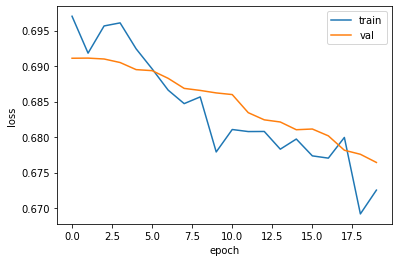

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# 訓練データとテストデータの誤差の履歴を描画
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

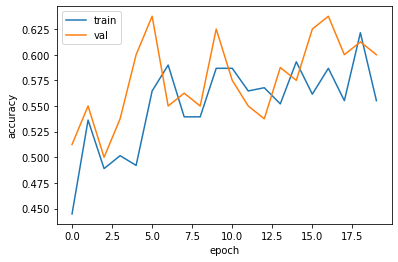

In [9]:
# 訓練データとテストデータの精度の履歴を描画
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##### === モデル作成はここまで ======================

In [10]:
import os
import cv2
import numpy as np

# 画像フォルダの指定
dirs = ['ants', 'bees']

# 練習問題7
# 画像のピクセル値とラベルを格納するリストを生成
pixels2 = [] # 説明変数
labels2 = [] # 目的変数

# 各フォルダのファイルを1つずつ読み込み、処理してリストへ格納
for i, d in enumerate(dirs):
    # ファイルの取得
    files = os.listdir('./data/' + d)
    
    for f in files:
        # 画像をグレースケールで読み込み
        img2 = cv2.imread('./data/' + d + '/' + f)
        # 画像をリサイズ
        img2 = cv2.resize(img2, (128, 128))
        # ピクセル値を正規化
        img2 = img2/255
        pixels2.append(img2)
        
        # 画像のラベルをリストへ格納 
        labels2.append(i)

In [11]:
from sklearn import model_selection

# Numpy配列へ変換して2次元配列へリサイズ
pixels2 = np.array(pixels2).reshape([-1, 128, 128, 3])
labels2 = np.array(labels2)

# 画像1枚目のデータサイズとラベルを確認
print(pixels2[0].shape)
print(labels2[0])

# データセットを訓練データとテストデータに分割
trainX, testX, trainY, testY = model_selection.train_test_split(
    pixels2, labels2, test_size=0.2)

# 訓練データとテストデータのサイズ確認
print(len(trainY))
print(len(testY))

(128, 128, 3)
0
317
80


##### === モデル作成はここから ======================

In [12]:
# kerasの読み込み
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
# 1つ目の畳み込み層とプーリング層
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
# 2つ目の畳み込み層とプーリング層
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
# 全結合層
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# 出力層
model.add(Dense(1, activation='sigmoid'))

# 作成したネットワークの確認
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
conv2d_3 (Conv2D)            (None, 124, 124, 16)      1216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 58, 58, 32)        12832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 29, 29, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 26912)             0 

In [13]:
# 学習条件の設定　誤差関数＝2値の交差エントロピー、最適化手法＝確率的勾配降下法、測定方法＝モデル精度
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 学習の実行 
hist = model.fit(trainX, trainY, batch_size=64, verbose=1, 
                 epochs=20, validation_data=(testX, testY))

Train on 317 samples, validate on 80 samples
Epoch 1/20
317/317 [==============================] - 2s 6ms/step - loss: 2.6383 - accuracy: 0.5016 - val_loss: 0.6857 - val_accuracy: 0.5625
Epoch 2/20
317/317 [==============================] - 2s 6ms/step - loss: 0.7258 - accuracy: 0.5016 - val_loss: 0.6915 - val_accuracy: 0.5625
Epoch 3/20
317/317 [==============================] - 2s 6ms/step - loss: 0.6937 - accuracy: 0.5016 - val_loss: 0.6930 - val_accuracy: 0.5500
Epoch 4/20
317/317 [==============================] - 2s 6ms/step - loss: 0.6936 - accuracy: 0.5016 - val_loss: 0.6933 - val_accuracy: 0.4375
Epoch 5/20
317/317 [==============================] - 2s 6ms/step - loss: 0.6920 - accuracy: 0.5016 - val_loss: 0.6933 - val_accuracy: 0.4375
Epoch 6/20
317/317 [==============================] - 2s 6ms/step - loss: 0.6922 - accuracy: 0.5142 - val_loss: 0.6934 - val_accuracy: 0.4375
Epoch 7/20
317/317 [==============================] - 2s 6ms/step - loss: 0.6920 - accuracy: 0.5678 - v

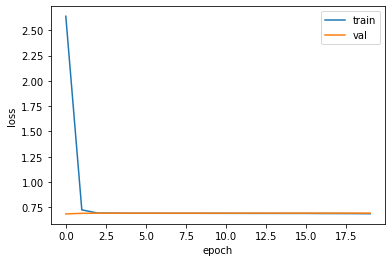

In [14]:
import matplotlib.pyplot as plt

# 訓練データとテストデータの誤差の履歴を描画
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

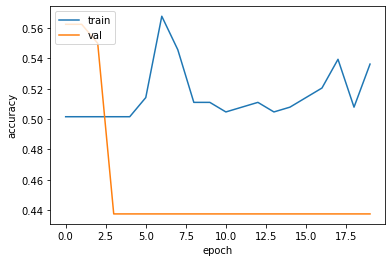

In [15]:
# 訓練データとテストデータの精度の履歴を描画
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##### === モデル作成はここまで ======================

#### 画像の水増し

In [16]:
# 画像をグレースケールで読み込み
img = cv2.imread('./data/ants/swiss-army-ant.jpg', 0)

# 画像の反転
x_img = cv2.flip(img, 0) # x軸を基準
y_img = cv2.flip(img, 1) # y軸を基準
xy_img = cv2.flip(img, -1) # xy軸を基準

# 画像の出力
cv2.imwrite('x_img.jpg', x_img)
cv2.imwrite('y_img.jpg', y_img)
cv2.imwrite('xy_img.jpg', xy_img)

True

In [17]:
# 画像の平滑化
blur_img = cv2.blur(img, (5,5)) # 平均値
gau_img = cv2.GaussianBlur(img, (5,5), 0) # ガウシアン
med_img = cv2.medianBlur(img, 5) # 中央値
#bilf_img = cv2.bilateralFilter(img, 9, 75, 75) # バイラテラル

# 画像の出力
cv2.imwrite('blur_img.jpg', blur_img)
cv2.imwrite('gau_img.jpg', gau_img)
cv2.imwrite('med_img.jpg', med_img)
#cv2.imwrite('bilf_img.jpg', bilf_img)

True

In [18]:
# ガンマ係数
gamma = 1.5

# ルックアップテーブルの作成
lut = np.zeros((256,1), dtype = 'uint8')

for i in range(len(lut)):
    lut[i][0] = 255 * pow((float(i)/255), (1.0/gamma))

# print(lut)
# 補正を掛けて画像を変換
gamma_img = cv2.LUT(img, lut)

# 画像の出力
cv2.imwrite('gamma_img.jpg', gamma_img)

True

In [19]:
# 練習問題8
files = os.listdir('./data/ants/')

# ガンマ係数
gamma = 0.6

# ガンマ係数が1.2に達するまで繰り返し処理
while gamma <= 1.2:
    # ルックアップテーブルの作成
    lut = np.zeros((256,1), dtype = 'uint8')

    for i in range(len(lut)):
        lut[i][0] = 255 * pow((float(i)/255), (1.0/gamma))

    for f in files:
        # 画像をグレースケールで読み込み
        img = cv2.imread('./data/ants/' + f, 0)
        # 補正を掛けて画像を変換
        gamma_img = cv2.LUT(img, lut)
        # 画像の出力
        cv2.imwrite('./data/dummy_ants/gamma' + str(gamma) + '_' + f, gamma_img)
        
    # ガンマ係数を0.6ずつ増加
    gamma = gamma + 0.6

##### === 豆知識はここから ======================

In [20]:
from keras import backend as K

# 1つ目の畳み込み層の特徴量を抽出
get_output = K.function([model.layers[0].input], [model.layers[0].output])
# テストデータに適用
output = get_output([testX, ])[0]

# データのサイズを確認
print(len(output)) # テストデータの件数
print(len(output[0])) # 縦のサイズ
print(len(output[0][0])) # 横のサイズ
print(len(output[0][0][0])) # フィルタ数

80
124
124
16


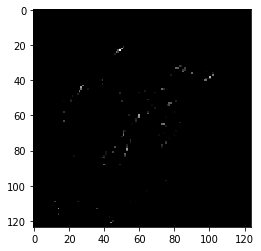

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

filter1 = []

# 画像1枚目の、1つ目の畳み込み層の特徴量を描画
for i in range(0, 1):
    for j in range(0, 124):
        tmp = pd.DataFrame(output[i][j])
        tmp = tmp[0]
        tmp = np.array(tmp).tolist()
        filter1.append(tmp)
        tmp = []

plt.imshow(np.array(filter1), cmap='gray')
plt.show()

##### === 豆知識はここまで ======================